In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments, outcomes = load_results("data/generated/genscen_Overijssel_5000_05-06-2021-19-07-26.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Overijssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]

In [4]:
experiments.size

265000

In [6]:
norm_outcomes = preprocessing.normalize(pd.DataFrame(outcomes))

In [7]:
pca = PCA(n_components=1)
pca.fit(norm_outcomes.T)
y = pd.Series(pca.components_[0])
x = experiments[uncertainties]

In [47]:
prim_alg = prim.Prim(x, y > 0.015, threshold=0.5)

In [48]:
box1 = prim_alg.find_box()

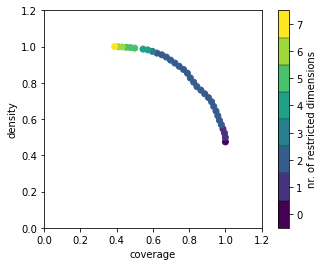

In [49]:
box1.show_tradeoff()
plt.show()

coverage    0.571489
density     0.981884
id                25
mass           0.276
mean        0.981884
res_dim            4
Name: 25, dtype: object

             box 25                                          
                min       max                       qp values
A.5_pfail  0.000173  0.636179   [-1.0, 7.715580854940526e-95]
A.4_pfail  0.516586  0.999874  [6.138290562168416e-234, -1.0]
A.3_pfail  0.049795  0.999876    [0.021971012183101938, -1.0]
A.2_pfail  0.049285  0.999841    [0.031751516045110846, -1.0]



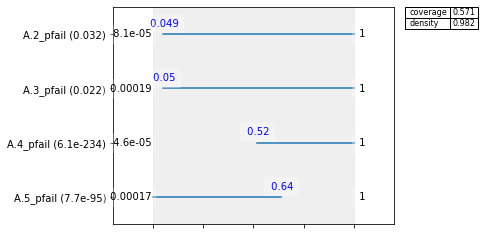

In [50]:
box1.inspect(25)
box1.inspect(25, style='graph')
plt.show()

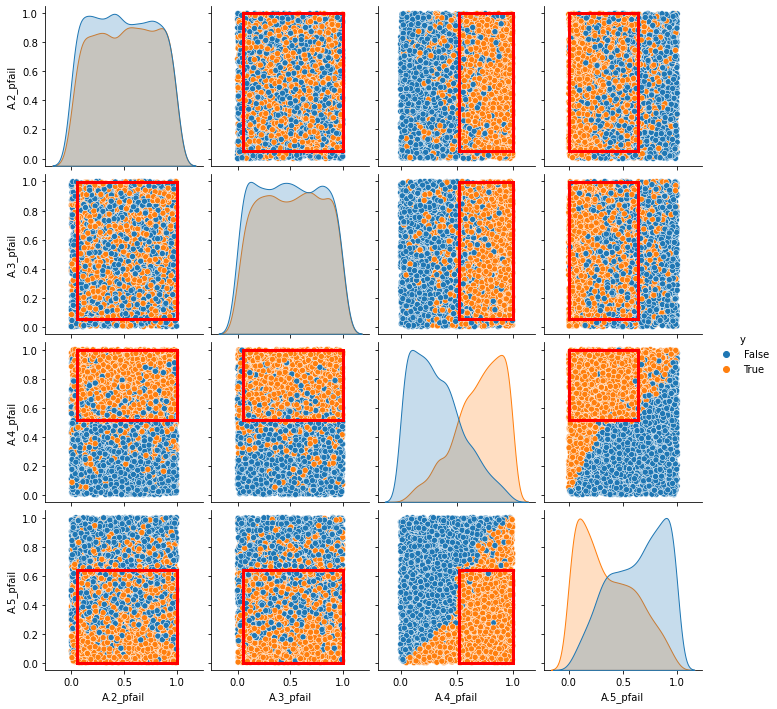

In [51]:
box1.select(25)
box1.show_pairs_scatter()